In [1]:
import csv
import os
import sys
from glob import glob
from os.path import join
import shutil

import cv2
import GPUtil
import numpy as np
from matplotlib import pyplot as plt
from natsort import natsorted
from PIL import Image
from scipy.ndimage.measurements import label as scipy_label
from tqdm.auto import tqdm
from VisTools import showmask

In [2]:
train_datapath = '/data/Kaggle/train-png'
train_mask_path = '/data/Kaggle/train-mask'
output_img_dir = '/data/Kaggle/pos-all-png'
output_mask_dir = '/data/Kaggle/pos-all-mask-png'
if not os.path.isdir(output_img_dir):
    os.mkdir(output_img_dir)
if not os.path.isdir(output_mask_dir):
    os.mkdir(output_mask_dir)

image_files = natsorted(glob(join(train_datapath,'*.png')))
mask_files = natsorted(glob(join(train_mask_path,'*.png')))

In [3]:
# get mask size
mask_file = mask_files[0]
mask_img = Image.open(mask_file)
mask_array = np.array(mask_img).astype(np.float)/255
mask_array.sum()

2868.0

In [4]:
tqdm.write('Getting all mask sizes...')
mask_sizes = [np.sum(np.array(Image.open(f)).astype(np.float)/255) for f in tqdm(mask_files)]

Getting all mask sizes...


In [5]:
sorted_sizes, sort_image_files, sort_mask_files = zip(*sorted(zip(mask_sizes, image_files, mask_files),reverse=True))

In [6]:
cutoff_size = 1000
cutoff_ind = np.where(np.array(sorted_sizes)>cutoff_size)[0][-1]
cutoff_ind

2313

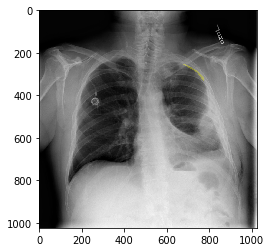

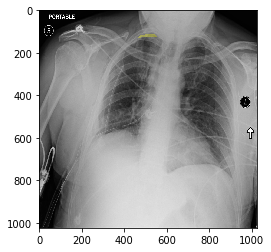

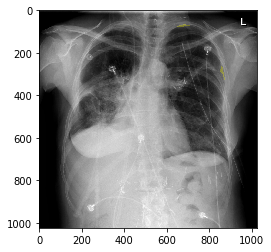

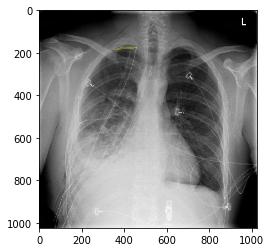

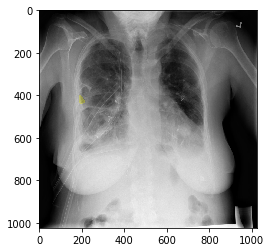

In [7]:
# Display masks that will *just* make the cutoff
ind = cutoff_ind
for ii in range(ind,ind+5):
    cur_im = np.array(Image.open(sort_image_files[ii]))
    cur_mask = np.array(Image.open(sort_mask_files[ii]))/255
    showmask(cur_im,cur_mask)

### Copy files that make cutoff to filtered directory

In [8]:
for cur_img_file,cur_mask_file in tqdm(zip(sort_image_files[:cutoff_ind],sort_mask_files[:cutoff_ind]),total=cutoff_ind):
    cur_img_name = os.path.split(cur_img_file)[-1]
    dest_img_file = join(output_img_dir,cur_img_name)
    dest_mask_file = join(output_mask_dir,cur_img_name)
    shutil.copyfile(cur_img_file,dest_img_file)
    shutil.copyfile(cur_mask_file,dest_mask_file)